In [247]:
from utils import list_change
import pandas as pd
import numpy as np
import glob
from keras import Sequential
from keras.layers import LSTM, Dense
import copy
import matplotlib.pyplot as plt
from utils import split_dataset, restore_changes
import os
import tensorflow as tf
import cv2

In [248]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')
# print(tf.__version__)
# tf.test.is_gpu_available()

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [249]:
# def formating(X, Y):
#     x_test = []
#     y_test = []
#     for x, y in zip(X, Y):
#         x_test+=x[0].tolist()
#         y_test+=y[0].tolist()
#     return np.array(x_test), np.array(y_test)
def formating(X, Y):
    x_test = []
    y_test = []
    for x, y in zip(X, Y):
        x_test+=x.tolist()
        y_test+=y.tolist()
    return np.array(x_test), np.array(y_test)

In [250]:
files = glob.glob('CutFrame_Output/output*/use2.txt')
data = [list_change(f) for f in files]

In [251]:
data=[]
for _dir in glob.glob('CutFrame_Output/output*/'):
    data.append([list_change(f) for f in glob.glob(_dir+'use*.txt')])
data = np.array(data)

In [252]:
len(data)

149

In [253]:
data = data.reshape(len(data),7,6)  #  7 frames 不可随意更改

In [254]:
print(data[0])

[[ 828.  635.  918.  512.  612. 1025.]
 [ 625.  676.  738.  597.  597. 1046.]
 [ 518.  740.  440.  779.  565. 1046.]
 [ 488.  821.  390.  884.  527. 1035.]
 [ 488.  880.  471.  908.  508. 1015.]
 [ 449.  817.  312.  890.  543. 1048.]
 [ 558.  689.  660.  582.  591. 1004.]]


In [255]:
# dataf = [pd.DataFrame(i,copy=True) for i in data]
# dataf

In [256]:
X = copy.deepcopy(data)
Y = copy.deepcopy(data)
X = np.delete(X, -1, axis=0)
Y = np.delete(Y, 0, axis=0)

In [257]:
len(X)

148

In [258]:
X, X_val, X_test, Y, Y_val, Y_test = split_dataset(X, Y)
# X_test, Y_test = formating(X_test, Y_test)
X_test=X_test[0]
Y_test=Y_test[0]

In [259]:
index = 0
points = restore_changes(X[index],index,None)
# points = ['pass']+points
# del(points[-1])
for n,f in enumerate(points):
    # if n==0:
    #     continue0
    img = cv2.imread(f'./CutFrame_Output/output{index}/frame_{n}.png')
    for q,p in enumerate(f):
        # print((p[0], p[1]))
        cv2.circle(img, (int(p[0]), int(p[1])), 3, (0, 255, 0), -1)
        cv2.putText(img, str(q), (int(p[0]), int(p[1])), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.imwrite(f'outputs/ori/output{n}.png', img)

In [260]:
X_test.shape

(7, 6)

### test

In [261]:
# X = np.array([[X[0]]])
# Y = np.array([[Y[0]]])
# X_test = X[0]
# Y_test = Y[0]

In [262]:
X.shape

(118, 7, 6)

### test end

In [263]:
for i in Y:
    if i.shape != (7, 6):
        print(i.shape)

In [264]:
l=[]
l0=[]
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(6))
model.compile(optimizer='adam', loss='mse')

history = model.fit(X, Y, epochs=500, batch_size=118, validation_data=(X, Y), verbose=1, shuffle=False)

# minimum_loss = float('inf')
# for epoch in range(2000):
    # for x, y in zip(X, Y):
    #     loss = model.train_on_batch(x, y)
    # print(epoch,end=': ')
    # l0.append(model.evaluate(X_test, Y_test))
    # if l0[-1] < minimum_loss:
    #         minimum_loss = l0[-1]
    #         model.save('best.h5')

Epoch 1/500
1/1 [==============================] - 1s 911ms/step - loss: 729186.5625 - val_loss: 699156.3125
Epoch 2/500
1/1 [==============================] - 0s 26ms/step - loss: 699156.3125 - val_loss: 667027.8125
Epoch 3/500
1/1 [==============================] - 0s 25ms/step - loss: 667027.8125 - val_loss: 635457.7500
Epoch 4/500
1/1 [==============================] - 0s 30ms/step - loss: 635457.7500 - val_loss: 609612.8125
Epoch 5/500
1/1 [==============================] - 0s 30ms/step - loss: 609612.8125 - val_loss: 588459.6875
Epoch 6/500
1/1 [==============================] - 0s 32ms/step - loss: 588459.6875 - val_loss: 568457.1250
Epoch 7/500
1/1 [==============================] - 0s 27ms/step - loss: 568457.1250 - val_loss: 548381.5625
Epoch 8/500
1/1 [==============================] - 0s 36ms/step - loss: 548381.5625 - val_loss: 528414.3750
Epoch 9/500
1/1 [==============================] - 0s 28ms/step - loss: 528414.3750 - val_loss: 511878.5000
Epoch 10/500
1/1 [=========

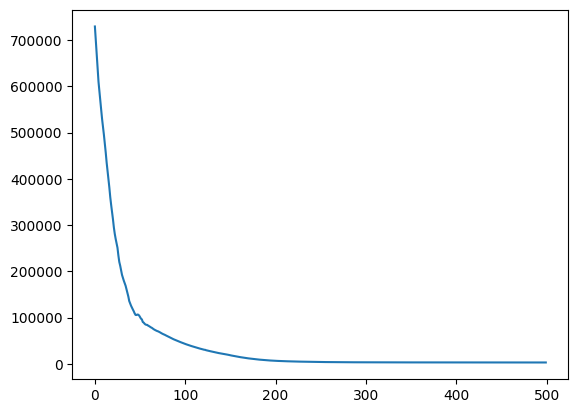

In [265]:
plt.plot(history.history['loss'])
plt.show()

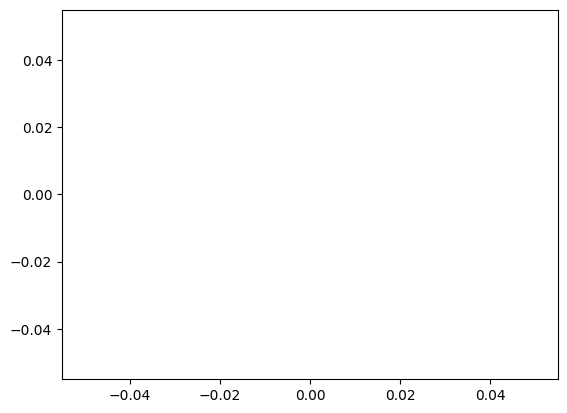

In [266]:
plt.plot(l)
plt.plot(l0)
plt.show()

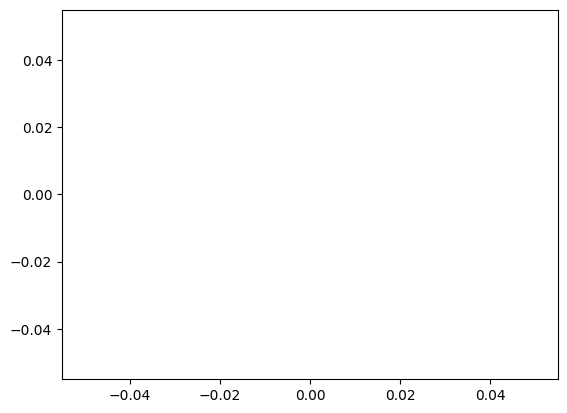

In [267]:
plt.plot(l0)

In [268]:
print(f'best epoch: {min(l0)}',f'best batch: {min(l)}')

ValueError: min() arg is an empty sequence

In [269]:
l0[-1]

IndexError: list index out of range

In [280]:
model.save('last.h5')

/home/itachi/miniconda3/envs/kera/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [281]:
data[0]

array([[ 828.,  635.,  918.,  512.,  612., 1025.],
       [ 625.,  676.,  738.,  597.,  597., 1046.],
       [ 518.,  740.,  440.,  779.,  565., 1046.],
       [ 488.,  821.,  390.,  884.,  527., 1035.],
       [ 488.,  880.,  471.,  908.,  508., 1015.],
       [ 449.,  817.,  312.,  890.,  543., 1048.],
       [ 558.,  689.,  660.,  582.,  591., 1004.]])

In [282]:
restore_changes(data[0],0,None)

[[[828.0, 635.0], [918.0, 512.0], [612.0, 1025.0]],
 [[625.0, 676.0], [738.0, 597.0], [597.0, 1046.0]],
 [[518.0, 740.0], [440.0, 779.0], [565.0, 1046.0]],
 [[488.0, 821.0], [390.0, 884.0], [527.0, 1035.0]],
 [[488.0, 880.0], [471.0, 908.0], [508.0, 1015.0]],
 [[449.0, 817.0], [312.0, 890.0], [543.0, 1048.0]],
 [[558.0, 689.0], [660.0, 582.0], [591.0, 1004.0]]]

In [283]:
# import cv2
# img=cv2.imread('CutFrame_Output/output0/frame_0.png')
# from utils import process_data
# import re
# from utils import list_change
# 
# data = process_data(r'CutFrame_Output/output0/use0.txt')
# data1 = list_change(r'CutFrame_Output/output0/use0.txt')
# print(data)
# print(data1)
# for p in data:
#     # print((p[0], p[1]))
#     cv2.circle(img, (int(p[0]), int(p[1])), 3, (0, 255, 0), -1)
# 
# for p in data1:
#     # print((p[0], p[1]))
#     cv2.circle(img, (int(p[0]), int(p[1])), 3, (0, 0, 255), -1)
# 
# cv2.imwrite('output.png', img)

In [284]:
# restore_changes(data[0],0)

In [285]:
model = tf.keras.models.load_model('last.h5')
# model.evaluate(X_test, Y_test)

In [286]:
a= model.predict(np.array([data[0]]))

1/1 [==============================] - 0s 127ms/step


In [287]:
a[0]

array([[ 714.97845,  637.553  ,  842.6971 ,  531.7755 ,  817.7172 ,
        1023.72534],
       [ 602.5797 ,  697.4571 ,  716.22455,  626.7535 ,  616.6941 ,
        1056.6932 ],
       [ 492.3739 ,  762.29987,  429.7335 ,  806.03265,  538.0654 ,
        1082.2389 ],
       [ 469.89633,  843.7392 ,  372.78513,  924.13293,  504.54062,
        1048.6172 ],
       [ 455.08966,  850.4774 ,  436.24942,  901.9841 ,  613.9966 ,
        1069.7616 ],
       [ 458.7365 ,  803.6503 ,  349.68265,  871.1874 ,  520.2437 ,
        1066.995  ],
       [ 537.9798 ,  662.5408 ,  645.8218 ,  623.5802 ,  753.2573 ,
         972.09564]], dtype=float32)

In [288]:
data[0]

array([[ 828.,  635.,  918.,  512.,  612., 1025.],
       [ 625.,  676.,  738.,  597.,  597., 1046.],
       [ 518.,  740.,  440.,  779.,  565., 1046.],
       [ 488.,  821.,  390.,  884.,  527., 1035.],
       [ 488.,  880.,  471.,  908.,  508., 1015.],
       [ 449.,  817.,  312.,  890.,  543., 1048.],
       [ 558.,  689.,  660.,  582.,  591., 1004.]])

In [289]:
points = restore_changes(a,0,None)
# points = ['pass']+points
# del(points[-1])
for n,f in enumerate(points):
    # if n==0:
    #     continue
    img = cv2.imread(f'./CutFrame_Output/output0/frame_{n}.png')
    for q,p in enumerate(f):
        # print((p[0], p[1]))
        cv2.circle(img, (int(p[0]), int(p[1])), 3, (0, 255, 0), -1)
        cv2.putText(img, str(q), (int(p[0]), int(p[1])), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.imwrite(f'outputs/output{n}.png', img)